<a href="https://colab.research.google.com/github/cyber-noob/Bitcoin-Scalping-using-Neural-Network/blob/main/vanillaa_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Imports

In [ ]:
!pip install --quiet yfinance

     |████████████████████████████████| 5.5MB 5.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis,skew
from scipy import stats
import yfinance as yf

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Data Extraction

In [ ]:
stock_name = "BTC-USD"

In [ ]:
data = yf.download(tickers=stock_name,
 period="7d",
 interval="1m")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-12-06 00:00:00+00:00,19154.179688,19154.179688,19154.179688,19154.179688,19154.179688,0
2020-12-06 00:01:00+00:00,19153.568359,19153.568359,19153.568359,19153.568359,19153.568359,0
2020-12-06 00:02:00+00:00,19153.707031,19153.707031,19153.707031,19153.707031,19153.707031,0
2020-12-06 00:03:00+00:00,19157.925781,19157.925781,19157.925781,19157.925781,19157.925781,0
2020-12-06 00:04:00+00:00,19198.068359,19198.068359,19198.068359,19198.068359,19198.068359,0


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-12-12 09:32:00+00:00,18463.068359,18463.068359,18463.068359,18463.068359,18463.068359,1239040
2020-12-12 09:33:00+00:00,18463.892578,18463.892578,18463.892578,18463.892578,18463.892578,0
2020-12-12 09:34:00+00:00,18463.031250,18463.031250,18463.031250,18463.031250,18463.031250,34240512
2020-12-12 09:35:00+00:00,18463.515625,18463.515625,18463.515625,18463.515625,18463.515625,0
2020-12-12 09:36:02+00:00,18461.480469,18461.480469,18461.480469,18461.480469,18461.480469,0


In [ ]:
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8433 entries, 0 to 8432
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   Datetime   8433 non-null   datetime64[ns, Europe/London]
 1   Open       8433 non-null   float64                      
 2   High       8433 non-null   float64                      
 3   Low        8433 non-null   float64                      
 4   Close      8433 non-null   float64                      
 5   Adj Close  8433 non-null   float64                      
 6   Volume     8433 non-null   int64                        
dtypes: datetime64[ns, Europe/London](1), float64(5), int64(1)
memory usage: 461.3 KB


In [ ]:
sns.set(rc={'figure.figsize':(35,10)})
data.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
8428,2020-12-12 09:32:00+00:00,18463.068359,18463.068359,18463.068359,18463.068359,18463.068359,1239040
8429,2020-12-12 09:33:00+00:00,18463.892578,18463.892578,18463.892578,18463.892578,18463.892578,0
8430,2020-12-12 09:34:00+00:00,18463.031250,18463.031250,18463.031250,18463.031250,18463.031250,34240512
8431,2020-12-12 09:35:00+00:00,18463.515625,18463.515625,18463.515625,18463.515625,18463.515625,0
8432,2020-12-12 09:36:02+00:00,18461.480469,18461.480469,18461.480469,18461.480469,18461.480469,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


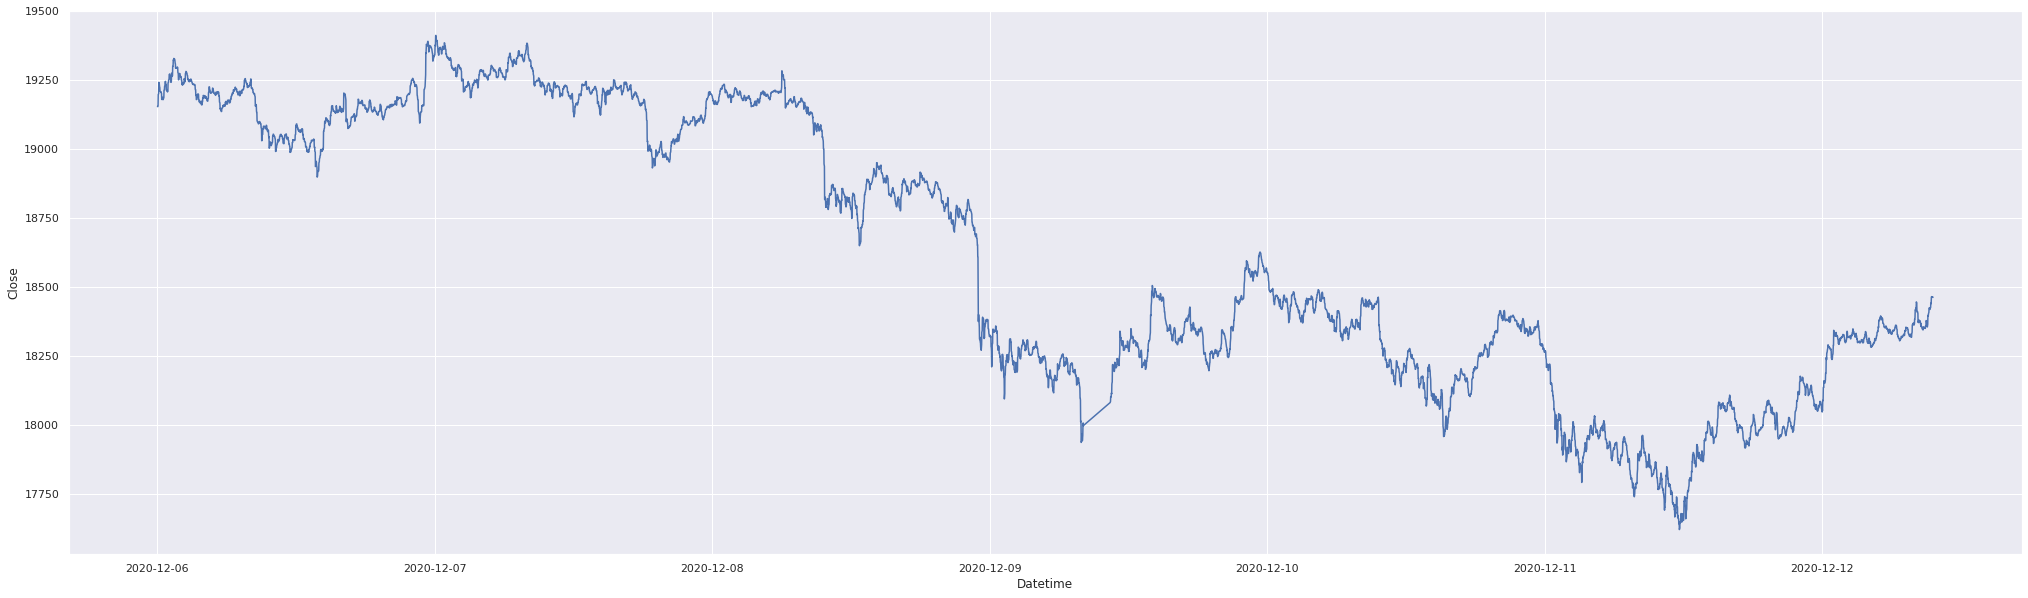

In [ ]:
y = data['Close']
x = data['Datetime']
plt.figure(figsize = (35,10))
sns.lineplot(x,y, legend='auto')

In [ ]:
prices = data.copy()

In [ ]:
prices = prices.head(300)

In [ ]:
import matplotlib
# plt.figure(figsize = (100,20))
width=1
width2=0.5
pricesup=prices[prices.Close>=prices.Open]
pricesdown=prices[prices.Close<prices.Open]

plt.bar(pricesup.index,pricesup.Close-pricesup.Open,width,bottom=pricesup.Open,color=['g'])
plt.bar(pricesup.index,pricesup.High-pricesup.Close,width2,bottom=pricesup.Close,color=['g'])
plt.bar(pricesup.index,pricesup.Low-pricesup.Open,width2,bottom=pricesup.Open,color=['g'])

plt.bar(pricesdown.index,pricesdown.Close-pricesdown.Open,width,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.High-pricesdown.Open,width2,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.Low-pricesdown.Close,width2, bottom=pricesdown.Close,color='red')
plt.xticks(np.arange(len(prices),step = 20), labels = prices.Datetime.dt.time)
plt.xlabel('Time (2020-08-28)', labelpad = 10)
plt.ylabel('Price', labelpad = 10)
plt.title('Candlestick Chart (5M)')
plt.grid()

In [ ]:
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [ ]:
len(train)

6746

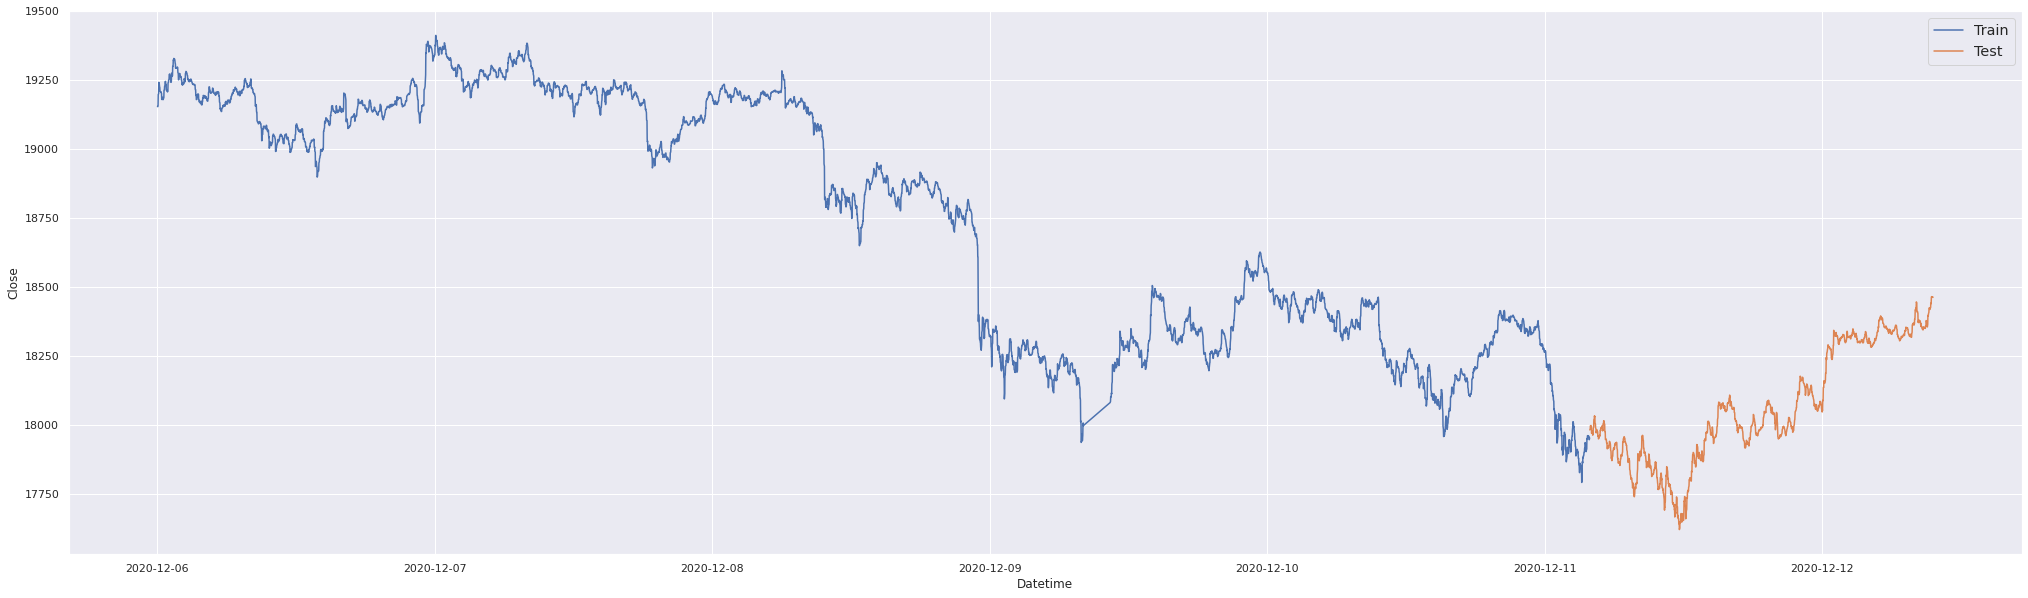

In [ ]:
g = sns.lineplot(x = train['Datetime'],y = train['Close'])
g = sns.lineplot(x = test['Datetime'],y = test['Close'])
plt.legend(labels = ['Train', 'Test'], loc = 'best', fontsize = 'large')
plt.show(g)

# Feature Engineering

In [ ]:
trainf = train['Close']

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = trainf.copy()
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
raw_seq[:6]

0    19154.179688
1    19153.568359
2    19153.707031
3    19157.925781
4    19198.068359
5    19199.128906
Name: Close, dtype: float64

In [ ]:
for i in range(5):
  print('train_x: ',X[i],'train_y: ',y[i])

train_x:  [19154.1796875  19153.56835938 19153.70703125 19157.92578125
 19198.06835938] train_y:  19199.12890625
train_x:  [19153.56835938 19153.70703125 19157.92578125 19198.06835938
 19199.12890625] train_y:  19199.890625
train_x:  [19153.70703125 19157.92578125 19198.06835938 19199.12890625
 19199.890625  ] train_y:  19241.234375
train_x:  [19157.92578125 19198.06835938 19199.12890625 19199.890625
 19241.234375  ] train_y:  19240.33984375
train_x:  [19198.06835938 19199.12890625 19199.890625   19241.234375
 19240.33984375] train_y:  19237.693359375


In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X)

In [ ]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y.reshape(-1,1))

In [ ]:
X.shape

(6741, 5)

In [ ]:
for i in range(5):
  print('train_x: ',scaled_train[i],'train_y: ',scaled_y[i])    #Printing out a sample of input output pairs for a clear understanding

train_x:  [0.84109129 0.84071424 0.84079977 0.84340175 0.86816032] train_y:  [0.86881442]
train_x:  [0.84071424 0.84079977 0.84340175 0.86816032 0.86881442] train_y:  [0.86928423]
train_x:  [0.84079977 0.84340175 0.86816032 0.86881442 0.86928423] train_y:  [0.89478363]
train_x:  [0.84340175 0.86816032 0.86881442 0.86928423 0.89478363] train_y:  [0.89423192]
train_x:  [0.86816032 0.86881442 0.86928423 0.89478363 0.89423192] train_y:  [0.89259966]


In [ ]:
X,y = scaled_train, scaled_y

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(6741, 5, 1)

# Model

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='swish', input_shape=(n_steps, n_features), return_sequences=True))  #Newest Activation function found by Google
model.add(LSTM(50, activation = 'swish'))                                                           #You can also use a Relu, both works fine
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = 'mse')

In [ ]:
model.fit(X,y,epochs=100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
211/211 [==============================] - 8s 39ms/step - loss: 0.0604 - mse: 0.0604
Epoch 2/100
211/211 [==============================] - 8s 39ms/step - loss: 0.0013 - mse: 0.0013
Epoch 3/100
211/211 [==============================] - 8s 39ms/step - loss: 9.5664e-04 - mse: 9.5664e-04
Epoch 4/100
211/211 [==============================] - 8s 40ms/step - loss: 5.8614e-04 - mse: 5.8614e-04
Epoch 5/100
211/211 [==============================] - 8s 39ms/step - loss: 3.1198e-04 - mse: 3.1198e-04
Epoch 6/100
211/211 [==============================] - 8s 40ms/step - loss: 1.8552e-04 - mse: 1.8552e-04
Epoch 7/100
211/211 [==============================] - 9s 40ms/step - loss: 1.6400e-04 - mse: 1.6400e-04
Epoch 8/100
211/211 [==============================] - 8s 40ms/step - loss: 1.6223e-04 - mse: 1.6223e-04
Epoch 9/100
211/211 [==============================] - 8s 40ms/step - loss: 1.6086e-04 - mse: 1.6086e-04
Epoch 10/100
211/211 [==============================] - 8s 39ms/step - 

In [ ]:
pred = model.predict(X)
# pred = scaler_y.inverse_transform(pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [ ]:
pred[:5]

array([[0.8670471 ],
       [0.871411  ],
       [0.87143886],
       [0.895482  ],
       [0.8969392 ]], dtype=float32)

In [ ]:
# y = scaler_y.inverse_transform(y)
y[:5]

array([[0.86881442],
       [0.86928423],
       [0.89478363],
       [0.89423192],
       [0.89259966]])

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y,pred))

In [ ]:
print('rmse: ',rmse)

rmse:  0.006647799028664336


In [ ]:
train[:5]

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-12-06 00:00:00+00:00,19154.179688,19154.179688,19154.179688,19154.179688,19154.179688,0
1,2020-12-06 00:01:00+00:00,19153.568359,19153.568359,19153.568359,19153.568359,19153.568359,0
2,2020-12-06 00:02:00+00:00,19153.707031,19153.707031,19153.707031,19153.707031,19153.707031,0
3,2020-12-06 00:03:00+00:00,19157.925781,19157.925781,19157.925781,19157.925781,19157.925781,0
4,2020-12-06 00:04:00+00:00,19198.068359,19198.068359,19198.068359,19198.068359,19198.068359,0


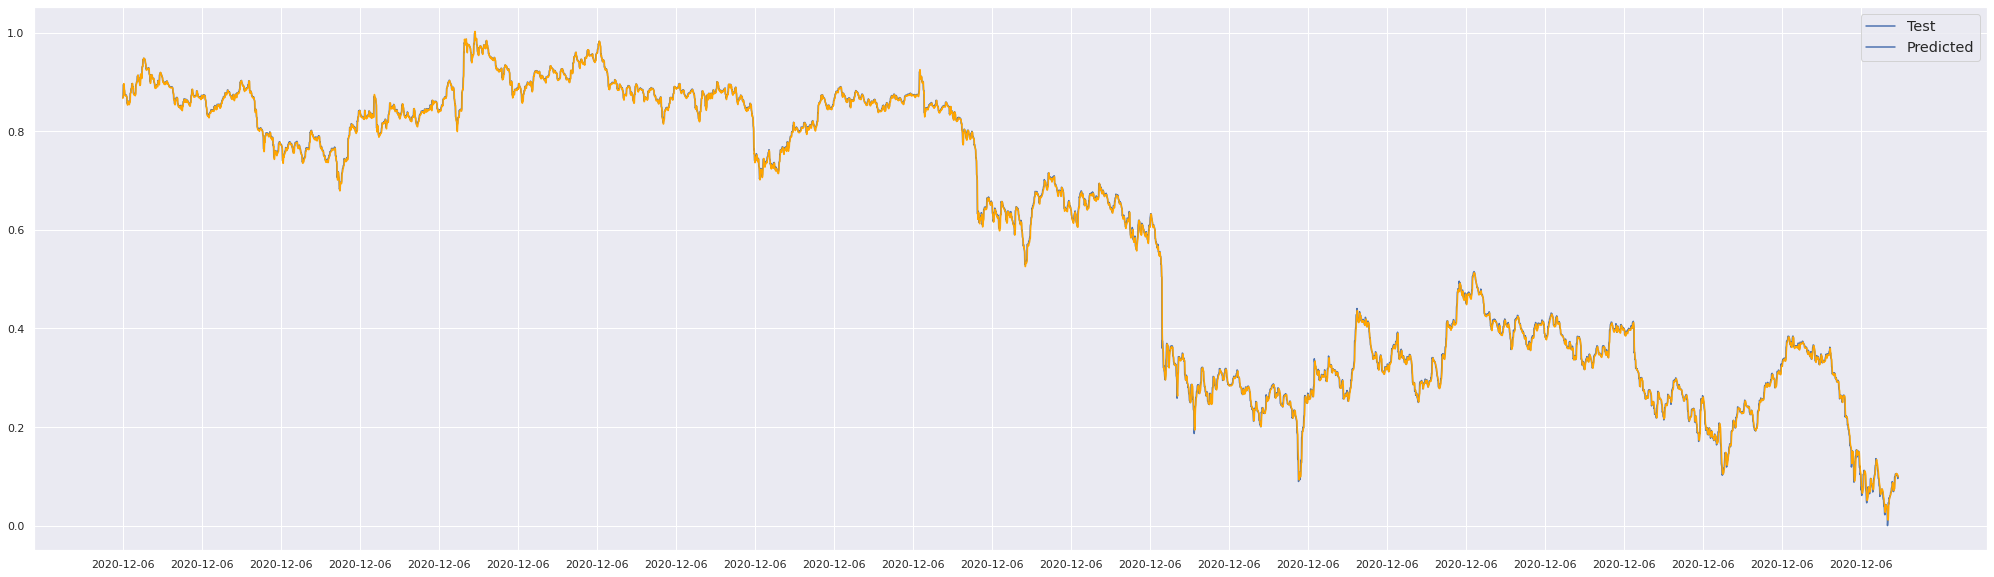

In [ ]:
sns.lineplot(data = y)
sns.lineplot(data = pred, palette = ['orange'])
plt.legend(labels = ['Test', 'Predicted'], loc = 'best', fontsize = 'large')
plt.xticks(np.arange(len(y),step=300),train['Datetime'].dt.date)
plt.show()

In [ ]:
testf = test['Close']

In [ ]:
testf = testf.reset_index().drop('index',axis=1)

In [ ]:
len(testf)

1687

In [ ]:
testf = np.array(testf)

In [ ]:
testf[:5]

array([[17981.12109375],
       [17982.59960938],
       [17983.01171875],
       [17995.49414062],
       [17994.5625    ]])

In [ ]:
test_x,test_y = split_sequence(testf,5)

In [ ]:
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1])

In [ ]:
test_x = scaler.transform(test_x)

In [ ]:
test_x[:5]

array([[0.11758902, 0.11850092, 0.1187551 , 0.12645383, 0.12587922],
       [0.11850092, 0.1187551 , 0.12645383, 0.12587922, 0.12730549],
       [0.1187551 , 0.12645383, 0.12587922, 0.12730549, 0.12747414],
       [0.12645383, 0.12587922, 0.12730549, 0.12747414, 0.12512272],
       [0.12587922, 0.12730549, 0.12747414, 0.12512272, 0.12506129]])

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], n_features))
test_x.shape

(1682, 5, 1)

In [ ]:
test_y[:5]

array([[17996.875     ],
       [17997.1484375 ],
       [17993.3359375 ],
       [17993.23632812],
       [17968.66992188]])

# Model Performance Breakdown

In [ ]:
pred = model.predict(test_x)
scaled_test_y = scaler_y.transform(test_y)

rmse = np.sqrt(mean_squared_error(scaled_test_y,pred))
print('Normalised RMSE:',rmse)

inverse_pred = scaler_y.inverse_transform(pred)

rmse = np.sqrt(mean_squared_error(test_y,inverse_pred))
print('Absolute RMSE:', rmse)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(scaled_test_y,pred)
print('Normalised MAPE: ',mape,'%')
mape = mean_absolute_percentage_error(test_y, inverse_pred)
print('Absolute MAPE: ',mape,'%')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Normalised RMSE: 0.006846230632587013
Absolute RMSE: 11.100235081413986
Normalised MAPE:  13.42967274422651 %
Absolute MAPE:  0.04146254310213609 %


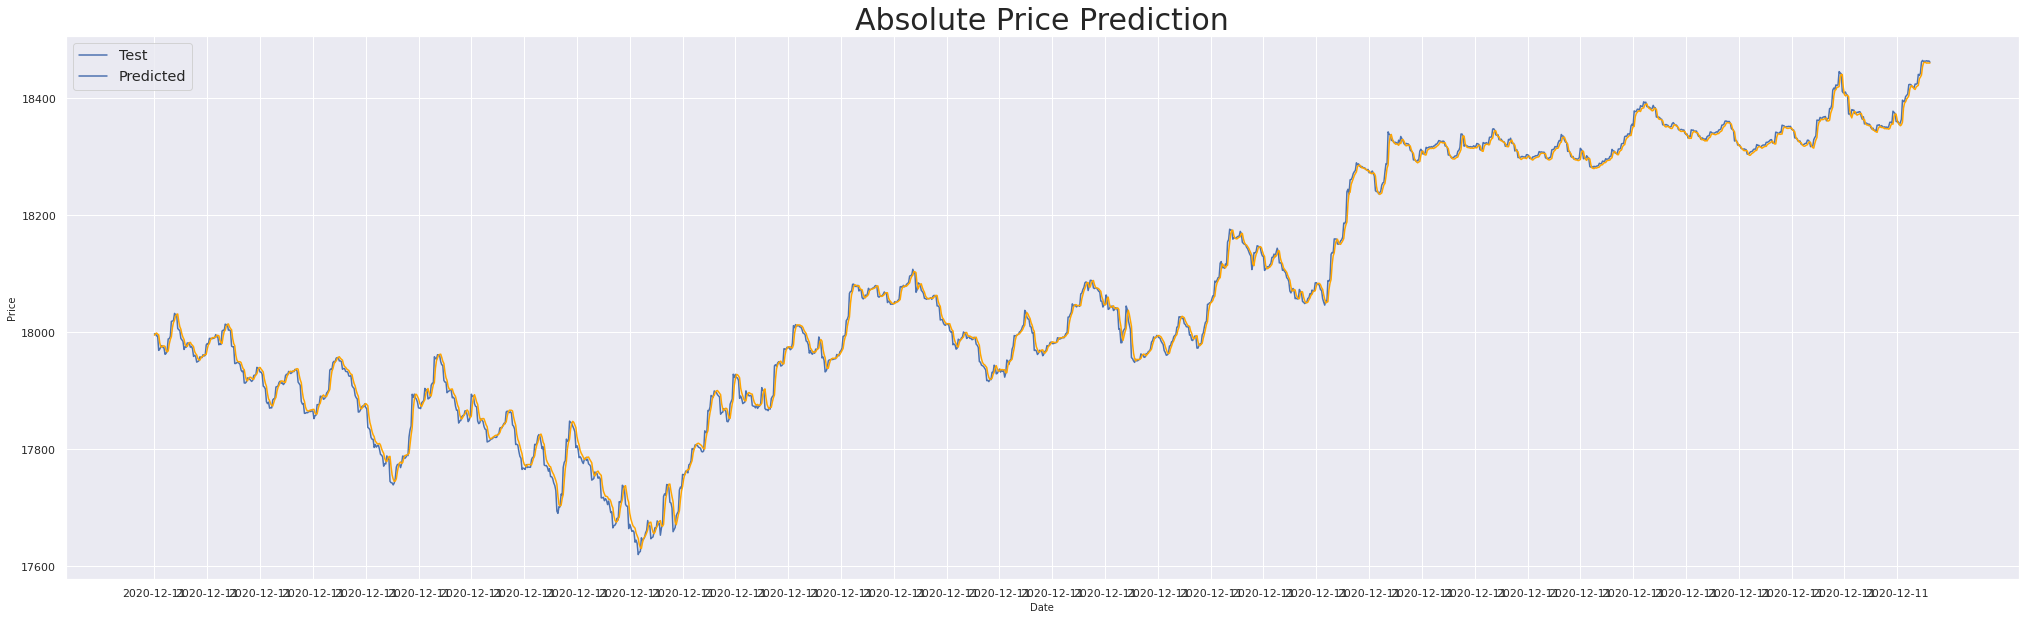

In [ ]:
sns.lineplot(data = test_y)
sns.lineplot(data = inverse_pred, palette = ['orange'])
plt.legend(labels = ['Test', 'Predicted'], loc = 'best', fontsize = 'large')
plt.xticks(np.arange(len(test_y),step=50),test['Datetime'].dt.date)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Absolute Price Prediction',fontsize=30)
plt.show()

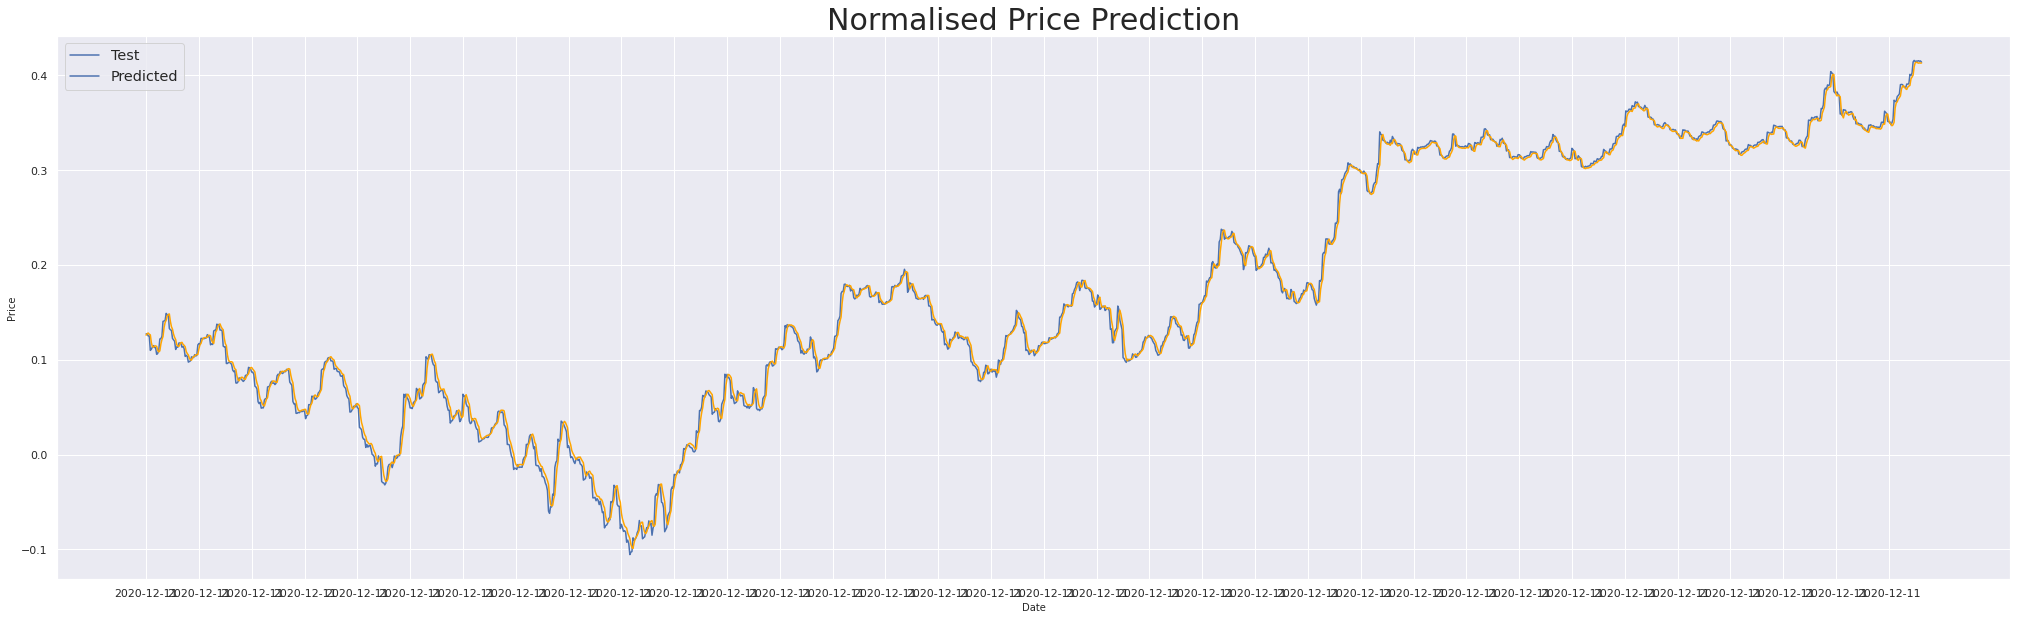

In [ ]:
sns.lineplot(data = scaled_test_y)
sns.lineplot(data = pred, palette = ['orange'])
plt.legend(labels = ['Test', 'Predicted'], loc = 'best', fontsize = 'large')
plt.xticks(np.arange(len(test_y),step=50),test['Datetime'].dt.date)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Normalised Price Prediction',fontsize=30)
plt.show()

In [ ]:
len(test_y)

1682

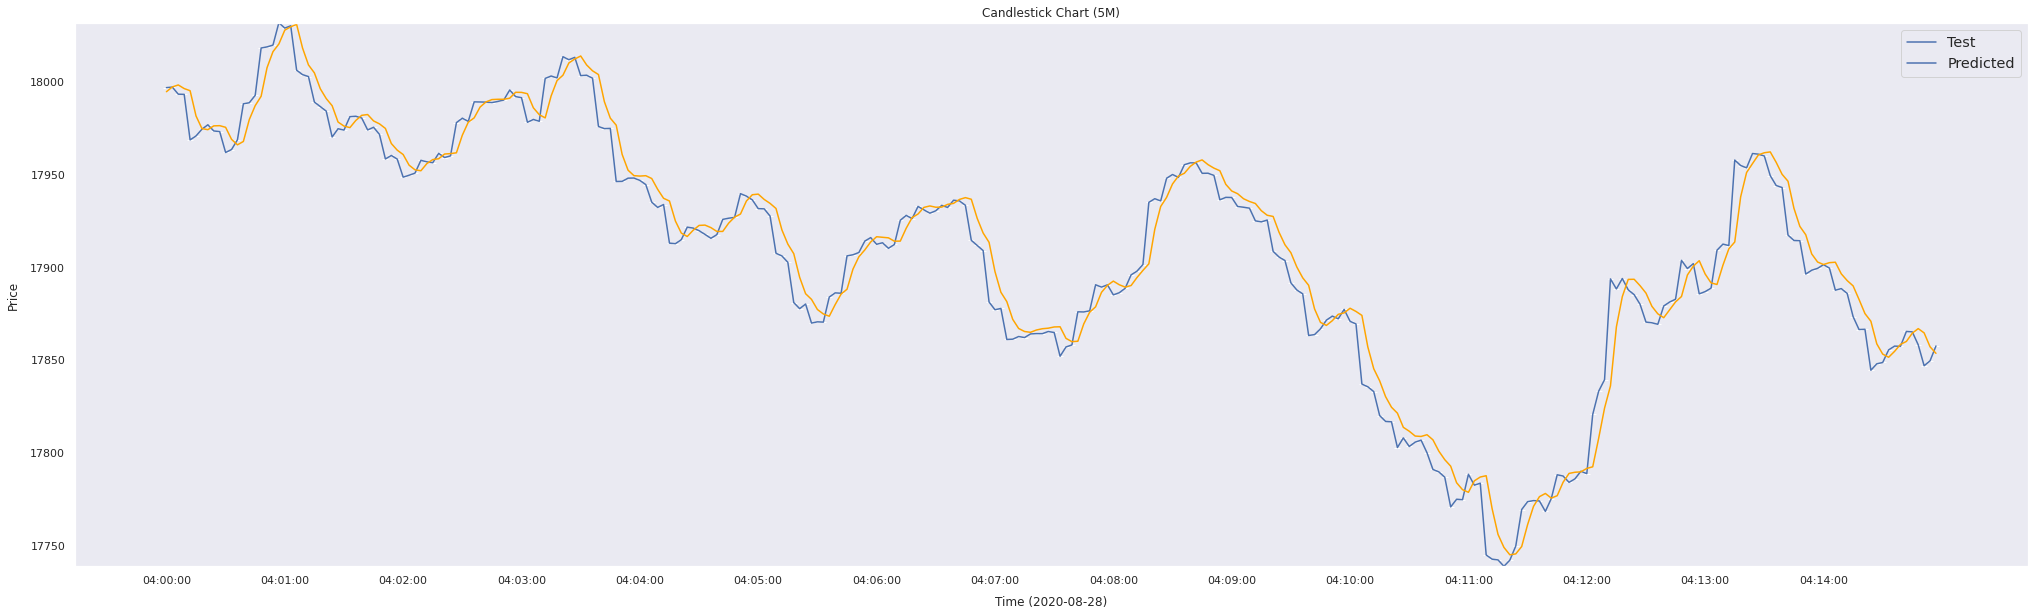

In [ ]:
prices = test.copy()
prices = prices[5:305].reset_index().drop(['index'],axis=1)
width=1
width2=0.5
pricesup=prices[prices.Close>=prices.Open]
pricesdown=prices[prices.Close<prices.Open]

plt.bar(pricesup.index,pricesup.Close-pricesup.Open,width,bottom=pricesup.Open,color='g')
plt.bar(pricesup.index,pricesup.High-pricesup.Close,width2,bottom=pricesup.Close,color='g')
plt.bar(pricesup.index,pricesup.Low-pricesup.Open,width2,bottom=pricesup.Open,color='g')

plt.bar(pricesdown.index,pricesdown.Close-pricesdown.Open,width,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.High-pricesdown.Open,width2,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.Low-pricesdown.Close,width2, bottom=pricesdown.Close,color='red')

sns.lineplot(data = test_y[:300])
sns.lineplot(data = inverse_pred[:300], palette = ['orange'])
plt.legend(labels = ['Test', 'Predicted'], loc = 'best', fontsize = 'large')

plt.xticks(np.arange(len(prices),step = 20), labels = prices.Datetime.dt.time)
plt.xlabel('Time (2020-08-28)', labelpad = 10)
plt.ylabel('Price', labelpad = 10)
plt.title('Candlestick Chart (5M)')
plt.grid()

In [ ]:
test.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
6746,2020-12-11 03:55:00+00:00,17981.121094,17981.121094,17981.121094,17981.121094,17981.121094,0
6747,2020-12-11 03:56:00+00:00,17982.599609,17982.599609,17982.599609,17982.599609,17982.599609,12384256
6748,2020-12-11 03:57:00+00:00,17983.011719,17983.011719,17983.011719,17983.011719,17983.011719,34019328
6749,2020-12-11 03:58:00+00:00,17995.494141,17995.494141,17995.494141,17995.494141,17995.494141,39276544
6750,2020-12-11 03:59:00+00:00,17994.562500,17994.562500,17994.562500,17994.562500,17994.562500,20588544


In [ ]:
len(test)

1687

In [ ]:
len(inverse_pred)

1682

In [ ]:
temp = [0]*5

In [ ]:
temp = np.concatenate((np.array(temp).reshape(-1,1),inverse_pred))
len(temp)

1687

In [ ]:
test['Predicted_Close'] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# test.to_csv('/content/drive/MyDrive/Stocks_pred/LSTM.csv',header=True,index=True)

**Realtime Monitor**

In [ ]:
import pytz
import time
import datetime as dt
!pip install yahoo_fin
from yahoo_fin import stock_info as si

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [ ]:
test['Close'].tail(4)

8429    18463.892578
8430    18463.031250
8431    18463.515625
8432    18461.480469
Name: Close, dtype: float64

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
################### Please use this block only if you want to check if the api is fetching the live prices properly ###########################

# tz = pytz.timezone('Asia/Kolkata')
# while True:
#   min = dt.datetime.now(tz = tz).minute
#   if (min%1 == 0 and (dt.datetime.now(tz=tz).second % 60) == 0):
#     print(si.get_live_price("BTC-USD"))
#   time.sleep(1)

In [ ]:
#Make a queue to render the real-time data into it used as input for the model
tz = pytz.timezone('Asia/Kolkata')
data_queue = list(test['Close'].tail(5))       #Input
predictions = [0,0]                           #To keep track of past and the present predictions made by the model
temp = []                                     #To keep track of P/L
print("data -> ",data_queue)
count = 0 
p_nd_l = 0
_df = []
p = None
while True:
  min = dt.datetime.now(tz = tz).minute
  if (min%1 == 0 and (dt.datetime.now(tz=tz).second % 60) == 0):
    try:
      price = si.get_live_price(stock_name)       #Live quotes
    except ValueError:
      continue
    print("\nmin_",min,":",price)

    data_queue.pop(0)
    data_queue.append(price)
    print("data -> ",data_queue)

    if count>=5:

      scaled_data = scaler.transform(np.array(data_queue).reshape(1,-1))
      n_features = 1
      scaled_data = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], n_features))
      pred = model.predict(scaled_data)
      inv_pred = np.rint(scaler_y.inverse_transform(pred))

      print("Prediction -> ",inv_pred,'\n')
      predictions.pop(0)
      predictions.append(inv_pred)

      _p = p

      print("_p: ",_p,"p: ",p)

      if (predictions[1] - predictions[0] > 0):
          p = 1
          print("BUY")
          _ = 'BUY'
          temp.append(price)
          print("temp -> ",temp)

      else:
          p = 0
          print("SELL")
          _ = 'SELL'
          temp.append(price)
          print("temp -> ",temp)

      if (_p != p):
        if (p==1 and _p==0):
          p_nd_l+=temp[0]-temp[-1]
          temp = []
          p = None
        if (p==0 and _p==1):
          p_nd_l+=temp[-1]-temp[0]
          temp = []
          p = None

      print("_p: ",_p,"p: ",p)
      print("P/L: ",p_nd_l,'\n')
      _df.append([_,temp,p_nd_l,dt.datetime.now(tz = tz)])

    count+=1

  time.sleep(1)

data ->  [18463.068359375, 18463.892578125, 18463.03125, 18463.515625, 18461.48046875]

min_ 24 : 18420.81640625
data ->  [18463.892578125, 18463.03125, 18463.515625, 18461.48046875, 18420.81640625]

min_ 25 : 18420.109375
data ->  [18463.03125, 18463.515625, 18461.48046875, 18420.81640625, 18420.109375]

min_ 26 : 18419.044921875
data ->  [18463.515625, 18461.48046875, 18420.81640625, 18420.109375, 18419.044921875]

min_ 27 : 18413.615234375
data ->  [18461.48046875, 18420.81640625, 18420.109375, 18419.044921875, 18413.615234375]

min_ 28 : 18415.619140625
data ->  [18420.81640625, 18420.109375, 18419.044921875, 18413.615234375, 18415.619140625]

min_ 29 : 18415.265625
data ->  [18420.109375, 18419.044921875, 18413.615234375, 18415.619140625, 18415.265625]
Prediction ->  [[18412.]] 

_p:  None p:  None
BUY
temp ->  [18415.265625]
_p:  None p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 30 : 18424.5
data ->  [18419.044921875, 18413.615234375, 18415.619140625, 18415.265625, 18424.5]
Prediction ->  [[18418.]] 

_p:  1 p:  1
BUY
temp ->  [18415.265625, 18424.5]
_p:  1 p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 31 : 18426.60546875
data ->  [18413.615234375, 18415.619140625, 18415.265625, 18424.5, 18426.60546875]
Prediction ->  [[18423.]] 

_p:  1 p:  1
BUY
temp ->  [18415.265625, 18424.5, 18426.60546875]
_p:  1 p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 32 : 18427.046875
data ->  [18415.619140625, 18415.265625, 18424.5, 18426.60546875, 18427.046875]
Prediction ->  [[18424.]] 

_p:  1 p:  1
BUY
temp ->  [18415.265625, 18424.5, 18426.60546875, 18427.046875]
_p:  1 p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 33 : 18434.49609375
data ->  [18415.265625, 18424.5, 18426.60546875, 18427.046875, 18434.49609375]
Prediction ->  [[18430.]] 

_p:  1 p:  1
BUY
temp ->  [18415.265625, 18424.5, 18426.60546875, 18427.046875, 18434.49609375]
_p:  1 p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 34 : 18437.1015625
data ->  [18424.5, 18426.60546875, 18427.046875, 18434.49609375, 18437.1015625]
Prediction ->  [[18433.]] 

_p:  1 p:  1
BUY
temp ->  [18415.265625, 18424.5, 18426.60546875, 18427.046875, 18434.49609375, 18437.1015625]
_p:  1 p:  1
P/L:  0 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 35 : 18434.95703125
data ->  [18426.60546875, 18427.046875, 18434.49609375, 18437.1015625, 18434.95703125]
Prediction ->  [[18433.]] 

_p:  1 p:  1
SELL
temp ->  [18415.265625, 18424.5, 18426.60546875, 18427.046875, 18434.49609375, 18437.1015625, 18434.95703125]
_p:  1 p:  None
P/L:  19.69140625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 36 : 18444.115234375
data ->  [18427.046875, 18434.49609375, 18437.1015625, 18434.95703125, 18444.115234375]
Prediction ->  [[18439.]] 

_p:  None p:  None
BUY
temp ->  [18444.115234375]
_p:  None p:  1
P/L:  19.69140625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 37 : 18444.431640625
data ->  [18434.49609375, 18437.1015625, 18434.95703125, 18444.115234375, 18444.431640625]
Prediction ->  [[18441.]] 

_p:  1 p:  1
BUY
temp ->  [18444.115234375, 18444.431640625]
_p:  1 p:  1
P/L:  19.69140625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 38 : 18443.544921875
data ->  [18437.1015625, 18434.95703125, 18444.115234375, 18444.431640625, 18443.544921875]
Prediction ->  [[18441.]] 

_p:  1 p:  1
SELL
temp ->  [18444.115234375, 18444.431640625, 18443.544921875]
_p:  1 p:  None
P/L:  19.12109375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 39 : 18445.75390625
data ->  [18434.95703125, 18444.115234375, 18444.431640625, 18443.544921875, 18445.75390625]
Prediction ->  [[18442.]] 

_p:  None p:  None
BUY
temp ->  [18445.75390625]
_p:  None p:  1
P/L:  19.12109375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 40 : 18444.607421875
data ->  [18444.115234375, 18444.431640625, 18443.544921875, 18445.75390625, 18444.607421875]
Prediction ->  [[18442.]] 

_p:  1 p:  1
SELL
temp ->  [18445.75390625, 18444.607421875]
_p:  1 p:  None
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 41 : 18441.515625
data ->  [18444.431640625, 18443.544921875, 18445.75390625, 18444.607421875, 18441.515625]
Prediction ->  [[18439.]] 

_p:  None p:  None
SELL
temp ->  [18441.515625]
_p:  None p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 42 : 18413.794921875
data ->  [18443.544921875, 18445.75390625, 18444.607421875, 18441.515625, 18413.794921875]
Prediction ->  [[18419.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 43 : 18416.26171875
data ->  [18445.75390625, 18444.607421875, 18441.515625, 18413.794921875, 18416.26171875]
Prediction ->  [[18412.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 44 : 18416.310546875
data ->  [18444.607421875, 18441.515625, 18413.794921875, 18416.26171875, 18416.310546875]
Prediction ->  [[18411.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 45 : 18413.265625
data ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625]
Prediction ->  [[18410.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 46 : 18412.470703125
data ->  [18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125]
Prediction ->  [[18410.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 47 : 18412.333984375
data ->  [18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375]
Prediction ->  [[18409.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 48 : 18400.822265625
data ->  [18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625]
Prediction ->  [[18401.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 49 : 18400.5390625
data ->  [18413.265625, 18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625]
Prediction ->  [[18398.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 50 : 18400.767578125
data ->  [18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625, 18400.767578125]
Prediction ->  [[18397.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625, 18400.767578125]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 51 : 18400.166015625
data ->  [18412.333984375, 18400.822265625, 18400.5390625, 18400.767578125, 18400.166015625]
Prediction ->  [[18397.]] 

_p:  0 p:  0
SELL
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625, 18400.767578125, 18400.166015625]
_p:  0 p:  0
P/L:  17.974609375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 52 : 18400.998046875
data ->  [18400.822265625, 18400.5390625, 18400.767578125, 18400.166015625, 18400.998046875]
Prediction ->  [[18398.]] 

_p:  0 p:  0
BUY
temp ->  [18441.515625, 18413.794921875, 18416.26171875, 18416.310546875, 18413.265625, 18412.470703125, 18412.333984375, 18400.822265625, 18400.5390625, 18400.767578125, 18400.166015625, 18400.998046875]
_p:  0 p:  None
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 53 : 18398.712890625
data ->  [18400.5390625, 18400.767578125, 18400.166015625, 18400.998046875, 18398.712890625]
Prediction ->  [[18396.]] 

_p:  None p:  None
SELL
temp ->  [18398.712890625]
_p:  None p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 54 : 18395.5546875
data ->  [18400.767578125, 18400.166015625, 18400.998046875, 18398.712890625, 18395.5546875]
Prediction ->  [[18394.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 55 : 18393.13671875
data ->  [18400.166015625, 18400.998046875, 18398.712890625, 18395.5546875, 18393.13671875]
Prediction ->  [[18391.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 56 : 18393.859375
data ->  [18400.998046875, 18398.712890625, 18395.5546875, 18393.13671875, 18393.859375]
Prediction ->  [[18390.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 57 : 18386.458984375
data ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375]
Prediction ->  [[18385.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 58 : 18386.361328125
data ->  [18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125]
Prediction ->  [[18383.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 59 : 18385.205078125
data ->  [18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125]
Prediction ->  [[18382.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 0 : 18383.138671875
data ->  [18393.859375, 18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Prediction ->  [[18381.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875]
_p:  0 p:  0
P/L:  58.4921875 


min_ 1 : 18382.93359375
data ->  [18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875, 18382.93359375]
Prediction ->  [[18380.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875, 18382.93359375]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 2 : 18383.560546875
data ->  [18386.361328125, 18385.205078125, 18383.138671875, 18382.93359375, 18383.560546875]
Prediction ->  [[18380.]] 

_p:  0 p:  0
SELL
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875, 18382.93359375, 18383.560546875]
_p:  0 p:  0
P/L:  58.4921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 3 : 18387.05859375
data ->  [18385.205078125, 18383.138671875, 18382.93359375, 18383.560546875, 18387.05859375]
Prediction ->  [[18383.]] 

_p:  0 p:  0
BUY
temp ->  [18398.712890625, 18395.5546875, 18393.13671875, 18393.859375, 18386.458984375, 18386.361328125, 18385.205078125, 18383.138671875, 18382.93359375, 18383.560546875, 18387.05859375]
_p:  0 p:  None
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 4 : 18387.994140625
data ->  [18383.138671875, 18382.93359375, 18383.560546875, 18387.05859375, 18387.994140625]
Prediction ->  [[18385.]] 

_p:  None p:  None
BUY
temp ->  [18387.994140625]
_p:  None p:  1
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 5 : 18392.453125
data ->  [18382.93359375, 18383.560546875, 18387.05859375, 18387.994140625, 18392.453125]
Prediction ->  [[18388.]] 

_p:  1 p:  1
BUY
temp ->  [18387.994140625, 18392.453125]
_p:  1 p:  1
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 6 : 18410.556640625
data ->  [18383.560546875, 18387.05859375, 18387.994140625, 18392.453125, 18410.556640625]
Prediction ->  [[18402.]] 

_p:  1 p:  1
BUY
temp ->  [18387.994140625, 18392.453125, 18410.556640625]
_p:  1 p:  1
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 7 : 18410.046875
data ->  [18387.05859375, 18387.994140625, 18392.453125, 18410.556640625, 18410.046875]
Prediction ->  [[18407.]] 

_p:  1 p:  1
BUY
temp ->  [18387.994140625, 18392.453125, 18410.556640625, 18410.046875]
_p:  1 p:  1
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 8 : 18410.091796875
data ->  [18387.994140625, 18392.453125, 18410.556640625, 18410.046875, 18410.091796875]
Prediction ->  [[18408.]] 

_p:  1 p:  1
BUY
temp ->  [18387.994140625, 18392.453125, 18410.556640625, 18410.046875, 18410.091796875]
_p:  1 p:  1
P/L:  70.146484375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 9 : 18401.85546875
data ->  [18392.453125, 18410.556640625, 18410.046875, 18410.091796875, 18401.85546875]
Prediction ->  [[18402.]] 

_p:  1 p:  1
SELL
temp ->  [18387.994140625, 18392.453125, 18410.556640625, 18410.046875, 18410.091796875, 18401.85546875]
_p:  1 p:  None
P/L:  84.0078125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 10 : 18402.30078125
data ->  [18410.556640625, 18410.046875, 18410.091796875, 18401.85546875, 18402.30078125]
Prediction ->  [[18399.]] 

_p:  None p:  None
SELL
temp ->  [18402.30078125]
_p:  None p:  0
P/L:  84.0078125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 11 : 18402.859375
data ->  [18410.046875, 18410.091796875, 18401.85546875, 18402.30078125, 18402.859375]
Prediction ->  [[18399.]] 

_p:  0 p:  0
SELL
temp ->  [18402.30078125, 18402.859375]
_p:  0 p:  0
P/L:  84.0078125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 12 : 18414.150390625
data ->  [18410.091796875, 18401.85546875, 18402.30078125, 18402.859375, 18414.150390625]
Prediction ->  [[18407.]] 

_p:  0 p:  0
BUY
temp ->  [18402.30078125, 18402.859375, 18414.150390625]
_p:  0 p:  None
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 13 : 18415.57421875
data ->  [18401.85546875, 18402.30078125, 18402.859375, 18414.150390625, 18415.57421875]
Prediction ->  [[18412.]] 

_p:  None p:  None
BUY
temp ->  [18415.57421875]
_p:  None p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 14 : 18416.9296875
data ->  [18402.30078125, 18402.859375, 18414.150390625, 18415.57421875, 18416.9296875]
Prediction ->  [[18414.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 15 : 18426.322265625
data ->  [18402.859375, 18414.150390625, 18415.57421875, 18416.9296875, 18426.322265625]
Prediction ->  [[18421.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 16 : 18427.1796875
data ->  [18414.150390625, 18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875]
Prediction ->  [[18424.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 17 : 18428.060546875
data ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875]
Prediction ->  [[18425.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 18 : 18433.373046875
data ->  [18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875]
Prediction ->  [[18429.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 19 : 18433.494140625
data ->  [18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875, 18433.494140625]
Prediction ->  [[18430.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875, 18433.494140625]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 20 : 18433.783203125
data ->  [18427.1796875, 18428.060546875, 18433.373046875, 18433.494140625, 18433.783203125]
Prediction ->  [[18431.]] 

_p:  1 p:  1
BUY
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875, 18433.494140625, 18433.783203125]
_p:  1 p:  1
P/L:  72.158203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 21 : 18430.751953125
data ->  [18428.060546875, 18433.373046875, 18433.494140625, 18433.783203125, 18430.751953125]
Prediction ->  [[18429.]] 

_p:  1 p:  1
SELL
temp ->  [18415.57421875, 18416.9296875, 18426.322265625, 18427.1796875, 18428.060546875, 18433.373046875, 18433.494140625, 18433.783203125, 18430.751953125]
_p:  1 p:  None
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 22 : 18429.638671875
data ->  [18433.373046875, 18433.494140625, 18433.783203125, 18430.751953125, 18429.638671875]
Prediction ->  [[18427.]] 

_p:  None p:  None
SELL
temp ->  [18429.638671875]
_p:  None p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 23 : 18428.95703125
data ->  [18433.494140625, 18433.783203125, 18430.751953125, 18429.638671875, 18428.95703125]
Prediction ->  [[18426.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 24 : 18410.333984375
data ->  [18433.783203125, 18430.751953125, 18429.638671875, 18428.95703125, 18410.333984375]
Prediction ->  [[18412.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 25 : 18408.6171875
data ->  [18430.751953125, 18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875]
Prediction ->  [[18406.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 26 : 18406.28515625
data ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625]
Prediction ->  [[18403.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 27 : 18391.197265625
data ->  [18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625]
Prediction ->  [[18392.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 28 : 18392.708984375
data ->  [18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625, 18392.708984375]
Prediction ->  [[18389.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625, 18392.708984375]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 29 : 18393.765625
data ->  [18408.6171875, 18406.28515625, 18391.197265625, 18392.708984375, 18393.765625]
Prediction ->  [[18389.]] 

_p:  0 p:  0
SELL
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625, 18392.708984375, 18393.765625]
_p:  0 p:  0
P/L:  87.3359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 30 : 18399.94140625
data ->  [18406.28515625, 18391.197265625, 18392.708984375, 18393.765625, 18399.94140625]
Prediction ->  [[18394.]] 

_p:  0 p:  0
BUY
temp ->  [18429.638671875, 18428.95703125, 18410.333984375, 18408.6171875, 18406.28515625, 18391.197265625, 18392.708984375, 18393.765625, 18399.94140625]
_p:  0 p:  None
P/L:  117.033203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 31 : 18399.755859375
data ->  [18391.197265625, 18392.708984375, 18393.765625, 18399.94140625, 18399.755859375]
Prediction ->  [[18397.]] 

_p:  None p:  None
BUY
temp ->  [18399.755859375]
_p:  None p:  1
P/L:  117.033203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 32 : 18398.28125
data ->  [18392.708984375, 18393.765625, 18399.94140625, 18399.755859375, 18398.28125]
Prediction ->  [[18396.]] 

_p:  1 p:  1
SELL
temp ->  [18399.755859375, 18398.28125]
_p:  1 p:  None
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 33 : 18390.9921875
data ->  [18393.765625, 18399.94140625, 18399.755859375, 18398.28125, 18390.9921875]
Prediction ->  [[18391.]] 

_p:  None p:  None
SELL
temp ->  [18390.9921875]
_p:  None p:  0
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 34 : 18391.138671875
data ->  [18399.94140625, 18399.755859375, 18398.28125, 18390.9921875, 18391.138671875]
Prediction ->  [[18388.]] 

_p:  0 p:  0
SELL
temp ->  [18390.9921875, 18391.138671875]
_p:  0 p:  0
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 35 : 18390.158203125
data ->  [18399.755859375, 18398.28125, 18390.9921875, 18391.138671875, 18390.158203125]
Prediction ->  [[18387.]] 

_p:  0 p:  0
SELL
temp ->  [18390.9921875, 18391.138671875, 18390.158203125]
_p:  0 p:  0
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 36 : 18383.298828125
data ->  [18398.28125, 18390.9921875, 18391.138671875, 18390.158203125, 18383.298828125]
Prediction ->  [[18382.]] 

_p:  0 p:  0
SELL
temp ->  [18390.9921875, 18391.138671875, 18390.158203125, 18383.298828125]
_p:  0 p:  0
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 37 : 18383.6328125
data ->  [18390.9921875, 18391.138671875, 18390.158203125, 18383.298828125, 18383.6328125]
Prediction ->  [[18381.]] 

_p:  0 p:  0
SELL
temp ->  [18390.9921875, 18391.138671875, 18390.158203125, 18383.298828125, 18383.6328125]
_p:  0 p:  0
P/L:  115.55859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 38 : 18388.818359375
data ->  [18391.138671875, 18390.158203125, 18383.298828125, 18383.6328125, 18388.818359375]
Prediction ->  [[18384.]] 

_p:  0 p:  0
BUY
temp ->  [18390.9921875, 18391.138671875, 18390.158203125, 18383.298828125, 18383.6328125, 18388.818359375]
_p:  0 p:  None
P/L:  117.732421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 39 : 18405.81640625
data ->  [18390.158203125, 18383.298828125, 18383.6328125, 18388.818359375, 18405.81640625]
Prediction ->  [[18397.]] 

_p:  None p:  None
BUY
temp ->  [18405.81640625]
_p:  None p:  1
P/L:  117.732421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 40 : 18405.83984375
data ->  [18383.298828125, 18383.6328125, 18388.818359375, 18405.81640625, 18405.83984375]
Prediction ->  [[18403.]] 

_p:  1 p:  1
BUY
temp ->  [18405.81640625, 18405.83984375]
_p:  1 p:  1
P/L:  117.732421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 41 : 18404.28515625
data ->  [18383.6328125, 18388.818359375, 18405.81640625, 18405.83984375, 18404.28515625]
Prediction ->  [[18403.]] 

_p:  1 p:  1
SELL
temp ->  [18405.81640625, 18405.83984375, 18404.28515625]
_p:  1 p:  None
P/L:  116.201171875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 42 : 18404.28515625
data ->  [18388.818359375, 18405.81640625, 18405.83984375, 18404.28515625, 18404.28515625]
Prediction ->  [[18402.]] 

_p:  None p:  None
SELL
temp ->  [18404.28515625]
_p:  None p:  0
P/L:  116.201171875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 43 : 18410.23828125
data ->  [18405.81640625, 18405.83984375, 18404.28515625, 18404.28515625, 18410.23828125]
Prediction ->  [[18405.]] 

_p:  0 p:  0
BUY
temp ->  [18404.28515625, 18410.23828125]
_p:  0 p:  None
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 44 : 18412.638671875
data ->  [18405.83984375, 18404.28515625, 18404.28515625, 18410.23828125, 18412.638671875]
Prediction ->  [[18409.]] 

_p:  None p:  None
BUY
temp ->  [18412.638671875]
_p:  None p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 45 : 18432.0078125
data ->  [18404.28515625, 18404.28515625, 18410.23828125, 18412.638671875, 18432.0078125]
Prediction ->  [[18423.]] 

_p:  1 p:  1
BUY
temp ->  [18412.638671875, 18432.0078125]
_p:  1 p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 46 : 18429.876953125
data ->  [18404.28515625, 18410.23828125, 18412.638671875, 18432.0078125, 18429.876953125]
Prediction ->  [[18428.]] 

_p:  1 p:  1
BUY
temp ->  [18412.638671875, 18432.0078125, 18429.876953125]
_p:  1 p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 47 : 18432.125
data ->  [18410.23828125, 18412.638671875, 18432.0078125, 18429.876953125, 18432.125]
Prediction ->  [[18430.]] 

_p:  1 p:  1
BUY
temp ->  [18412.638671875, 18432.0078125, 18429.876953125, 18432.125]
_p:  1 p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 48 : 18449.744140625
data ->  [18412.638671875, 18432.0078125, 18429.876953125, 18432.125, 18449.744140625]
Prediction ->  [[18442.]] 

_p:  1 p:  1
BUY
temp ->  [18412.638671875, 18432.0078125, 18429.876953125, 18432.125, 18449.744140625]
_p:  1 p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 49 : 18448.83203125
data ->  [18432.0078125, 18429.876953125, 18432.125, 18449.744140625, 18448.83203125]
Prediction ->  [[18446.]] 

_p:  1 p:  1
BUY
temp ->  [18412.638671875, 18432.0078125, 18429.876953125, 18432.125, 18449.744140625, 18448.83203125]
_p:  1 p:  1
P/L:  110.248046875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 50 : 18447.126953125
data ->  [18429.876953125, 18432.125, 18449.744140625, 18448.83203125, 18447.126953125]
Prediction ->  [[18446.]] 

_p:  1 p:  1
SELL
temp ->  [18412.638671875, 18432.0078125, 18429.876953125, 18432.125, 18449.744140625, 18448.83203125, 18447.126953125]
_p:  1 p:  None
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 51 : 18440.421875
data ->  [18432.125, 18449.744140625, 18448.83203125, 18447.126953125, 18440.421875]
Prediction ->  [[18440.]] 

_p:  None p:  None
SELL
temp ->  [18440.421875]
_p:  None p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 52 : 18438.888671875
data ->  [18449.744140625, 18448.83203125, 18447.126953125, 18440.421875, 18438.888671875]
Prediction ->  [[18436.]] 

_p:  0 p:  0
SELL
temp ->  [18440.421875, 18438.888671875]
_p:  0 p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 53 : 18439.955078125
data ->  [18448.83203125, 18447.126953125, 18440.421875, 18438.888671875, 18439.955078125]
Prediction ->  [[18436.]] 

_p:  0 p:  0
SELL
temp ->  [18440.421875, 18438.888671875, 18439.955078125]
_p:  0 p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 54 : 18427.85546875
data ->  [18447.126953125, 18440.421875, 18438.888671875, 18439.955078125, 18427.85546875]
Prediction ->  [[18428.]] 

_p:  0 p:  0
SELL
temp ->  [18440.421875, 18438.888671875, 18439.955078125, 18427.85546875]
_p:  0 p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 55 : 18426.9921875
data ->  [18440.421875, 18438.888671875, 18439.955078125, 18427.85546875, 18426.9921875]
Prediction ->  [[18424.]] 

_p:  0 p:  0
SELL
temp ->  [18440.421875, 18438.888671875, 18439.955078125, 18427.85546875, 18426.9921875]
_p:  0 p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 56 : 18428.986328125
data ->  [18438.888671875, 18439.955078125, 18427.85546875, 18426.9921875, 18428.986328125]
Prediction ->  [[18424.]] 

_p:  0 p:  0
SELL
temp ->  [18440.421875, 18438.888671875, 18439.955078125, 18427.85546875, 18426.9921875, 18428.986328125]
_p:  0 p:  0
P/L:  144.736328125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 57 : 18438.375
data ->  [18439.955078125, 18427.85546875, 18426.9921875, 18428.986328125, 18438.375]
Prediction ->  [[18432.]] 

_p:  0 p:  0
BUY
temp ->  [18440.421875, 18438.888671875, 18439.955078125, 18427.85546875, 18426.9921875, 18428.986328125, 18438.375]
_p:  0 p:  None
P/L:  146.783203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 58 : 18438.611328125
data ->  [18427.85546875, 18426.9921875, 18428.986328125, 18438.375, 18438.611328125]
Prediction ->  [[18435.]] 

_p:  None p:  None
BUY
temp ->  [18438.611328125]
_p:  None p:  1
P/L:  146.783203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 59 : 18438.005859375
data ->  [18426.9921875, 18428.986328125, 18438.375, 18438.611328125, 18438.005859375]
Prediction ->  [[18436.]] 

_p:  1 p:  1
BUY
temp ->  [18438.611328125, 18438.005859375]
_p:  1 p:  1
P/L:  146.783203125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 0 : 18439.294921875
data ->  [18428.986328125, 18438.375, 18438.611328125, 18438.005859375, 18439.294921875]
Prediction ->  [[18436.]] 

_p:  1 p:  1
SELL
temp ->  [18438.611328125, 18438.005859375, 18439.294921875]
_p:  1 p:  None
P/L:  147.466796875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 1 : 18439.091796875
data ->  [18438.375, 18438.611328125, 18438.005859375, 18439.294921875, 18439.091796875]
Prediction ->  [[18436.]] 

_p:  None p:  None
SELL
temp ->  [18439.091796875]
_p:  None p:  0
P/L:  147.466796875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 2 : 18439.447265625
data ->  [18438.611328125, 18438.005859375, 18439.294921875, 18439.091796875, 18439.447265625]
Prediction ->  [[18436.]] 

_p:  0 p:  0
SELL
temp ->  [18439.091796875, 18439.447265625]
_p:  0 p:  0
P/L:  147.466796875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 3 : 18440.615234375
data ->  [18438.005859375, 18439.294921875, 18439.091796875, 18439.447265625, 18440.615234375]
Prediction ->  [[18437.]] 

_p:  0 p:  0
BUY
temp ->  [18439.091796875, 18439.447265625, 18440.615234375]
_p:  0 p:  None
P/L:  145.943359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 4 : 18441.046875
data ->  [18439.294921875, 18439.091796875, 18439.447265625, 18440.615234375, 18441.046875]
Prediction ->  [[18438.]] 

_p:  None p:  None
BUY
temp ->  [18441.046875]
_p:  None p:  1
P/L:  145.943359375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 5 : 18441.208984375
data ->  [18439.091796875, 18439.447265625, 18440.615234375, 18441.046875, 18441.208984375]
Prediction ->  [[18438.]] 

_p:  1 p:  1
SELL
temp ->  [18441.046875, 18441.208984375]
_p:  1 p:  None
P/L:  146.10546875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 6 : 18441.50390625
data ->  [18439.447265625, 18440.615234375, 18441.046875, 18441.208984375, 18441.50390625]
Prediction ->  [[18438.]] 

_p:  None p:  None
SELL
temp ->  [18441.50390625]
_p:  None p:  0
P/L:  146.10546875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 7 : 18442.0703125
data ->  [18440.615234375, 18441.046875, 18441.208984375, 18441.50390625, 18442.0703125]
Prediction ->  [[18439.]] 

_p:  0 p:  0
BUY
temp ->  [18441.50390625, 18442.0703125]
_p:  0 p:  None
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 8 : 18443.546875
data ->  [18441.046875, 18441.208984375, 18441.50390625, 18442.0703125, 18443.546875]
Prediction ->  [[18440.]] 

_p:  None p:  None
BUY
temp ->  [18443.546875]
_p:  None p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 9 : 18454.69921875
data ->  [18441.208984375, 18441.50390625, 18442.0703125, 18443.546875, 18454.69921875]
Prediction ->  [[18448.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 10 : 18454.720703125
data ->  [18441.50390625, 18442.0703125, 18443.546875, 18454.69921875, 18454.720703125]
Prediction ->  [[18451.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875, 18454.720703125]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 11 : 18457.224609375
data ->  [18442.0703125, 18443.546875, 18454.69921875, 18454.720703125, 18457.224609375]
Prediction ->  [[18454.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 12 : 18473.19140625
data ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625]
Prediction ->  [[18466.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 13 : 18473.419921875
data ->  [18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625, 18473.419921875]
Prediction ->  [[18470.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625, 18473.419921875]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 14 : 18475.767578125
data ->  [18454.720703125, 18457.224609375, 18473.19140625, 18473.419921875, 18475.767578125]
Prediction ->  [[18473.]] 

_p:  1 p:  1
BUY
temp ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625, 18473.419921875, 18475.767578125]
_p:  1 p:  1
P/L:  145.5390625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 15 : 18474.95703125
data ->  [18457.224609375, 18473.19140625, 18473.419921875, 18475.767578125, 18474.95703125]
Prediction ->  [[18473.]] 

_p:  1 p:  1
SELL
temp ->  [18443.546875, 18454.69921875, 18454.720703125, 18457.224609375, 18473.19140625, 18473.419921875, 18475.767578125, 18474.95703125]
_p:  1 p:  None
P/L:  176.94921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 16 : 18474.365234375
data ->  [18473.19140625, 18473.419921875, 18475.767578125, 18474.95703125, 18474.365234375]
Prediction ->  [[18471.]] 

_p:  None p:  None
SELL
temp ->  [18474.365234375]
_p:  None p:  0
P/L:  176.94921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 17 : 18473.748046875
data ->  [18473.419921875, 18475.767578125, 18474.95703125, 18474.365234375, 18473.748046875]
Prediction ->  [[18470.]] 

_p:  0 p:  0
SELL
temp ->  [18474.365234375, 18473.748046875]
_p:  0 p:  0
P/L:  176.94921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 18 : 18467.505859375
data ->  [18475.767578125, 18474.95703125, 18474.365234375, 18473.748046875, 18467.505859375]
Prediction ->  [[18466.]] 

_p:  0 p:  0
SELL
temp ->  [18474.365234375, 18473.748046875, 18467.505859375]
_p:  0 p:  0
P/L:  176.94921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 19 : 18467.71484375
data ->  [18474.95703125, 18474.365234375, 18473.748046875, 18467.505859375, 18467.71484375]
Prediction ->  [[18464.]] 

_p:  0 p:  0
SELL
temp ->  [18474.365234375, 18473.748046875, 18467.505859375, 18467.71484375]
_p:  0 p:  0
P/L:  176.94921875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 20 : 18471.8046875
data ->  [18474.365234375, 18473.748046875, 18467.505859375, 18467.71484375, 18471.8046875]
Prediction ->  [[18467.]] 

_p:  0 p:  0
BUY
temp ->  [18474.365234375, 18473.748046875, 18467.505859375, 18467.71484375, 18471.8046875]
_p:  0 p:  None
P/L:  179.509765625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 21 : 18482.01953125
data ->  [18473.748046875, 18467.505859375, 18467.71484375, 18471.8046875, 18482.01953125]
Prediction ->  [[18475.]] 

_p:  None p:  None
BUY
temp ->  [18482.01953125]
_p:  None p:  1
P/L:  179.509765625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 22 : 18481.486328125
data ->  [18467.505859375, 18467.71484375, 18471.8046875, 18482.01953125, 18481.486328125]
Prediction ->  [[18479.]] 

_p:  1 p:  1
BUY
temp ->  [18482.01953125, 18481.486328125]
_p:  1 p:  1
P/L:  179.509765625 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 23 : 18479.3671875
data ->  [18467.71484375, 18471.8046875, 18482.01953125, 18481.486328125, 18479.3671875]
Prediction ->  [[18477.]] 

_p:  1 p:  1
SELL
temp ->  [18482.01953125, 18481.486328125, 18479.3671875]
_p:  1 p:  None
P/L:  176.857421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 24 : 18487.228515625
data ->  [18471.8046875, 18482.01953125, 18481.486328125, 18479.3671875, 18487.228515625]
Prediction ->  [[18482.]] 

_p:  None p:  None
BUY
temp ->  [18487.228515625]
_p:  None p:  1
P/L:  176.857421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 25 : 18489.00390625
data ->  [18482.01953125, 18481.486328125, 18479.3671875, 18487.228515625, 18489.00390625]
Prediction ->  [[18485.]] 

_p:  1 p:  1
BUY
temp ->  [18487.228515625, 18489.00390625]
_p:  1 p:  1
P/L:  176.857421875 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 26 : 18488.263671875
data ->  [18481.486328125, 18479.3671875, 18487.228515625, 18489.00390625, 18488.263671875]
Prediction ->  [[18485.]] 

_p:  1 p:  1
SELL
temp ->  [18487.228515625, 18489.00390625, 18488.263671875]
_p:  1 p:  None
P/L:  177.892578125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 27 : 18485.046875
data ->  [18479.3671875, 18487.228515625, 18489.00390625, 18488.263671875, 18485.046875]
Prediction ->  [[18483.]] 

_p:  None p:  None
SELL
temp ->  [18485.046875]
_p:  None p:  0
P/L:  177.892578125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 28 : 18486.3359375
data ->  [18487.228515625, 18489.00390625, 18488.263671875, 18485.046875, 18486.3359375]
Prediction ->  [[18482.]] 

_p:  0 p:  0
SELL
temp ->  [18485.046875, 18486.3359375]
_p:  0 p:  0
P/L:  177.892578125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 29 : 18487.353515625
data ->  [18489.00390625, 18488.263671875, 18485.046875, 18486.3359375, 18487.353515625]
Prediction ->  [[18483.]] 

_p:  0 p:  0
BUY
temp ->  [18485.046875, 18486.3359375, 18487.353515625]
_p:  0 p:  None
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 30 : 18496.66015625
data ->  [18488.263671875, 18485.046875, 18486.3359375, 18487.353515625, 18496.66015625]
Prediction ->  [[18491.]] 

_p:  None p:  None
BUY
temp ->  [18496.66015625]
_p:  None p:  1
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 31 : 18498.068359375
data ->  [18485.046875, 18486.3359375, 18487.353515625, 18496.66015625, 18498.068359375]
Prediction ->  [[18494.]] 

_p:  1 p:  1
BUY
temp ->  [18496.66015625, 18498.068359375]
_p:  1 p:  1
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 32 : 18497.4765625
data ->  [18486.3359375, 18487.353515625, 18496.66015625, 18498.068359375, 18497.4765625]
Prediction ->  [[18495.]] 

_p:  1 p:  1
BUY
temp ->  [18496.66015625, 18498.068359375, 18497.4765625]
_p:  1 p:  1
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 33 : 18511.20703125
data ->  [18487.353515625, 18496.66015625, 18498.068359375, 18497.4765625, 18511.20703125]
Prediction ->  [[18505.]] 

_p:  1 p:  1
BUY
temp ->  [18496.66015625, 18498.068359375, 18497.4765625, 18511.20703125]
_p:  1 p:  1
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 34 : 18512.259765625
data ->  [18496.66015625, 18498.068359375, 18497.4765625, 18511.20703125, 18512.259765625]
Prediction ->  [[18509.]] 

_p:  1 p:  1
BUY
temp ->  [18496.66015625, 18498.068359375, 18497.4765625, 18511.20703125, 18512.259765625]
_p:  1 p:  1
P/L:  175.5859375 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



min_ 35 : 18510.90234375
data ->  [18498.068359375, 18497.4765625, 18511.20703125, 18512.259765625, 18510.90234375]
Prediction ->  [[18509.]] 

_p:  1 p:  1
SELL
temp ->  [18496.66015625, 18498.068359375, 18497.4765625, 18511.20703125, 18512.259765625, 18510.90234375]
_p:  1 p:  None
P/L:  189.828125 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


KeyboardInterrupt: ignored

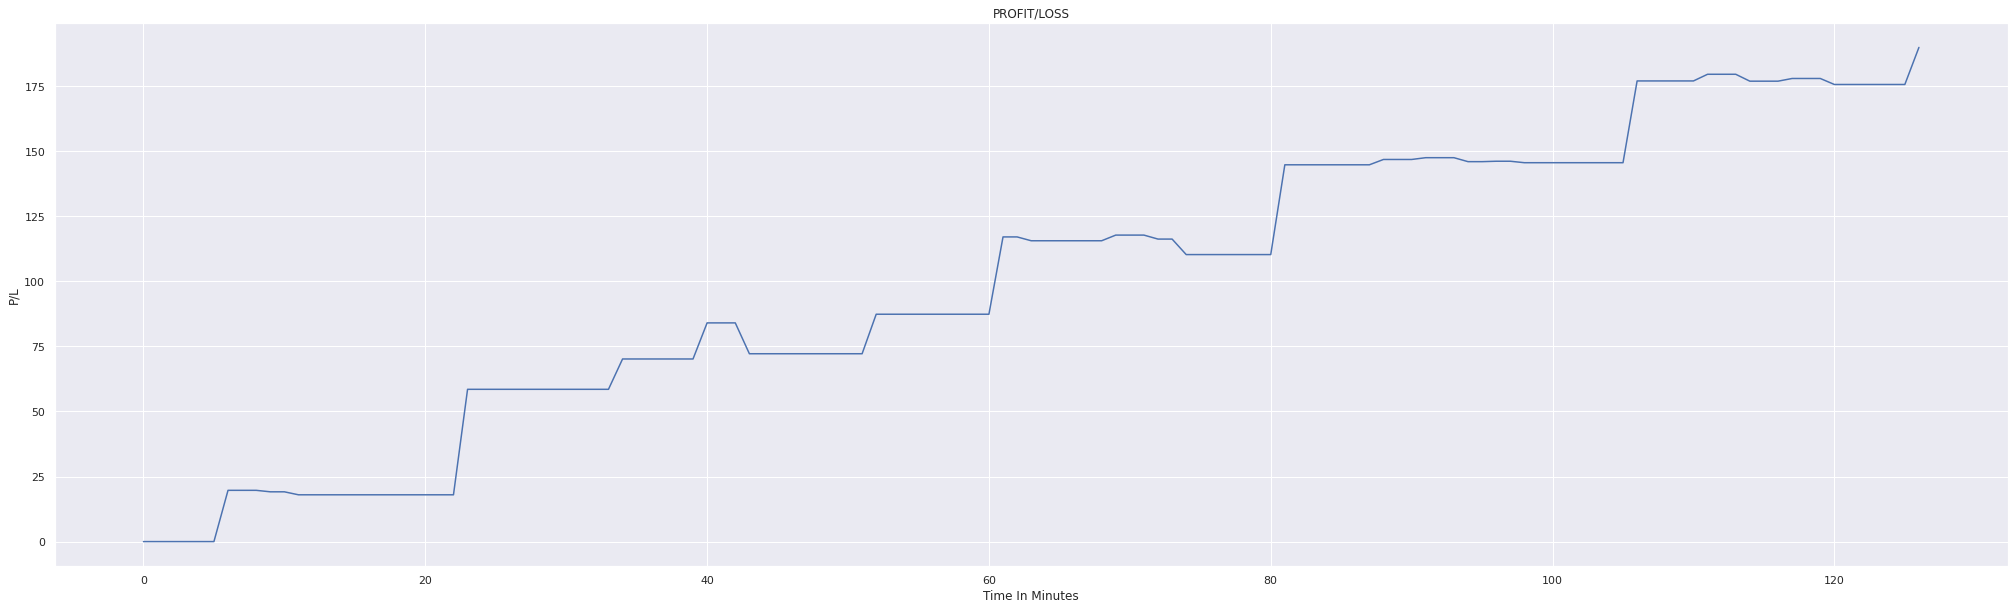

In [ ]:
df = pd.DataFrame(_df, columns = ['BUY/SELL Calls','Price','P/L','DateTime'])
sns.lineplot(data = df['P/L'])
plt.title("PROFIT/LOSS")
plt.xlabel('Time In Minutes')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Stocks_pred/PndL(3).csv',header=True,index=True)

In [ ]:
_df1 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL.csv')
_df2 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(1).csv')
_df3 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(2).csv')
_df4 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(3).csv')

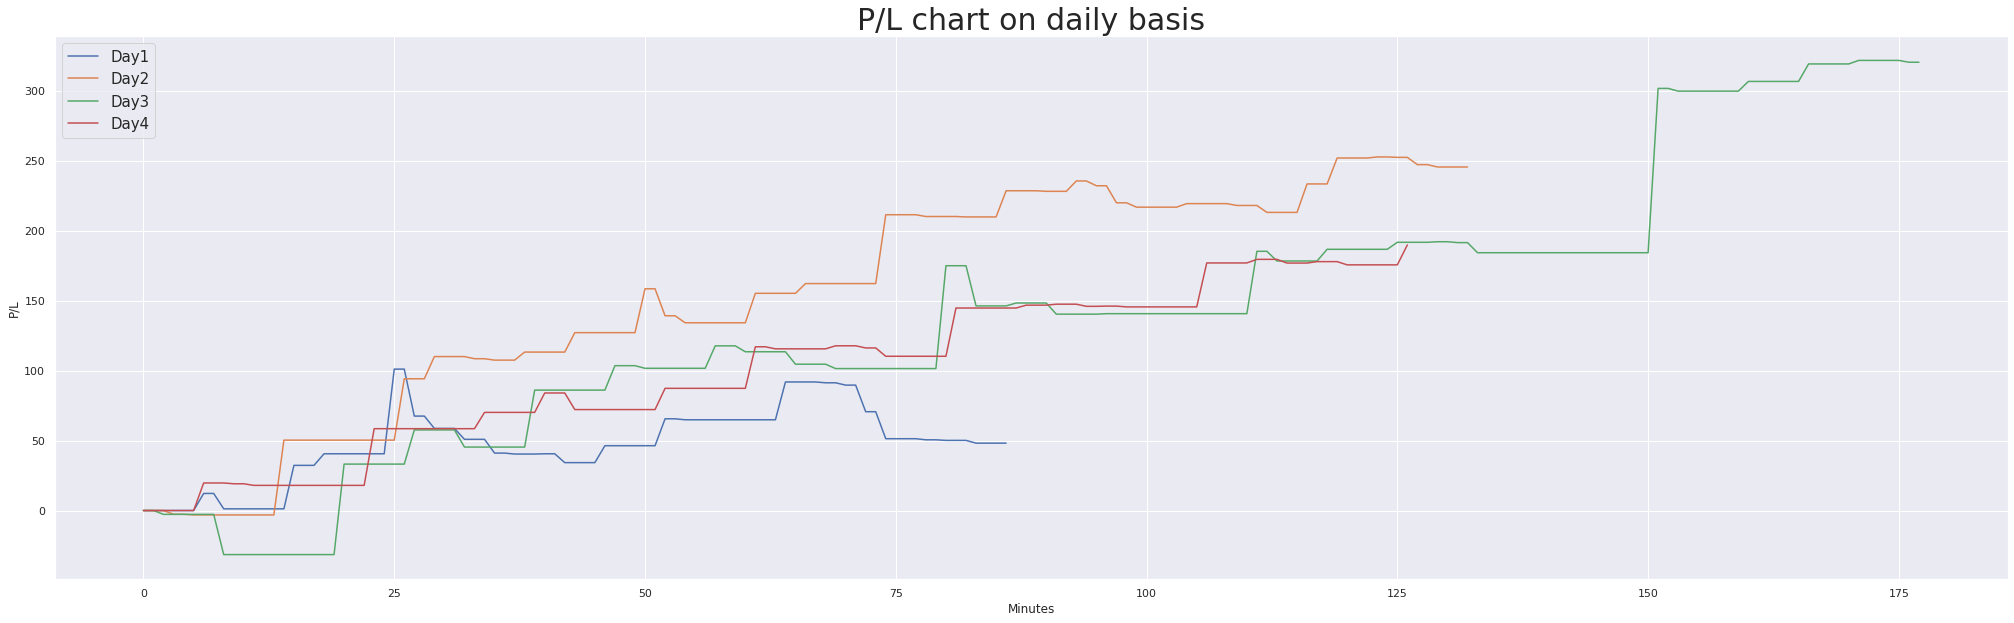

In [ ]:
sns.lineplot(data = _df1['P/L'])
sns.lineplot(data = _df2['P/L'])
sns.lineplot(data = _df3['P/L'])
sns.lineplot(data = _df4['P/L'])
plt.title("P/L chart on daily basis",fontsize = 30)
plt.xlabel('Minutes')
plt.legend(labels = ['Day1','Day2','Day3','Day4'], fontsize=15)
plt.show()